In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text

In [5]:
# Load dataset
iris =  load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
X = iris.data[:, :2]
y = iris.target

In [8]:
# split data intp train test sets
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [11]:
# train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [17]:
# check accuracy
y_pred = clf.predict(X_test)
print(f"accuracy_score : {accuracy_score(y_test,y_pred)}")

accuracy_score : 0.8


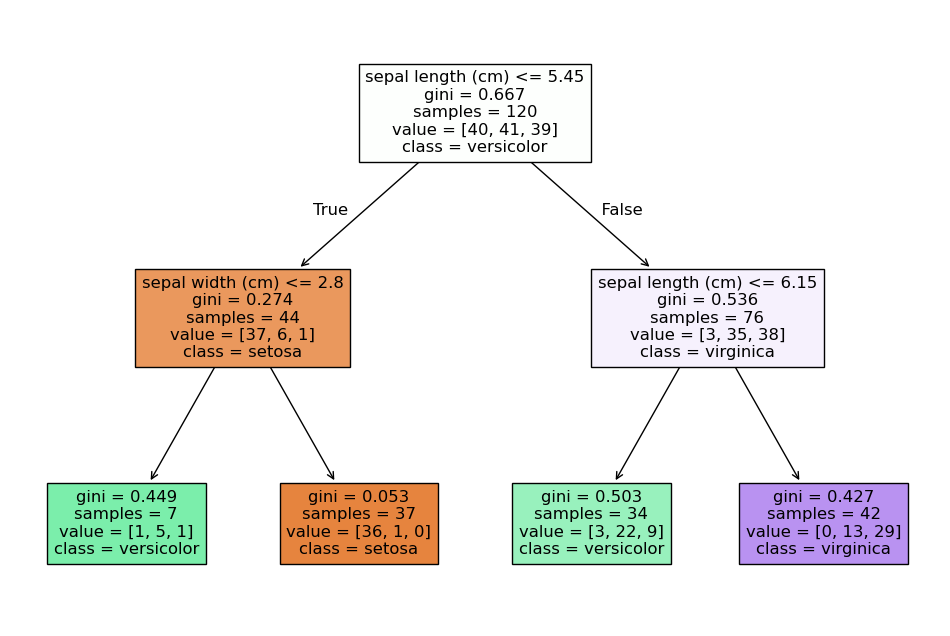

In [ ]:
# plot the decisoin tree
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=iris.feature_names[:2],class_names=iris.target_names)
plt.show()

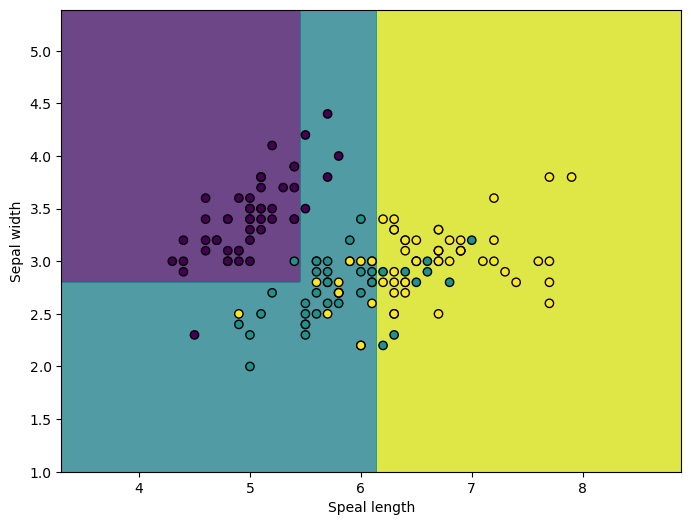

In [ ]:
# plot the decision boundary
plt.figure(figsize=(8,6))
x_min,x_max = X[:, 0].min() -1 , X[:, 0].max()+1
y_min ,y_max = X[:, 1].min()-1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.01),
                    np.arange(y_min,y_max,0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1],c =y , edgecolors='k')
plt.xlabel('Speal length')
plt.ylabel('Sepal width')
plt.show()

In [15]:
r = export_text(clf, feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2



In [16]:
clf.feature_importances_

array([0.8253173, 0.1746827])